# Solar Radiation Prediction

<img src="https://i.natgeofe.com/k/f576c284-661a-4046-ba51-fa95699e1a8b/hawaii-beach_16x9.png" alt="Image Description" style="width: 400px; height: 300px;">


# Develop a predictive model to estimate solar radiation using time, date, temperature, and humidity data. The dataset comprises historical records from Hawaii.


### Importing  necessary libraries

In [2]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
from pytz import timezone
import pytz
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

 
import pickle

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 15)

In [3]:
df=pd.read_csv('SolarPrediction1.csv')
df1=df.copy()

In [4]:
df.shape

(32911, 11)

In [5]:
df.sample(20)

UNIXTime                    Data      Time  Radiation  Temperature  \
4674   1.473718e+09        09-12-2016 00:00  12:10:22     160.85         63.0   
17574  1.480081e+09  11/25/2016 12:00:00 AM  03:35:02       1.18         46.0   
1010   1.474915e+09   9/26/2016 12:00:00 AM  08:35:27     571.85         55.0   
21817  1.478807e+09        11-10-2016 00:00  09:45:03     702.96         62.0   
20396  1.479233e+09  11/15/2016 12:00:00 AM  08:10:01     382.78         51.0   
8883   1.477553e+09  10/26/2016 12:00:00 AM  21:30:18       1.23         47.0   
13268  1.476226e+09        10-11-2016 00:00  12:40:18    1129.92         59.0   
14425  1.475871e+09        10-07-2016 00:00  10:05:24     856.05         58.0   
27539  1.482358e+09  12/21/2016 12:00:00 AM  12:05:49     843.52         59.0   
11116  1.476882e+09  10/19/2016 12:00:00 AM  02:55:22       1.20         47.0   
5855   1.473214e+09        09-06-2016 00:00  16:05:19     246.76         57.0   
26531  1.482661e+09  12/25/2016 12:00:00 AM  00:11:36       1.20         46.0   
22586  1.478576e+09        11-07-2016 00:00  17:40:08       7.01         53.0   
15541  1.475529e+09        10-03-2016 00:00  11:05:22     339.04         55.0   
10373  1.477105e+09  10/21/2016 12:00:00 AM  16:50:18     322.78         50.0   
3767   1.474067e+09   9/16/2016 12:00:00 AM  13:10:03     320.35         58.0   
26822  1.482573e+09  12/23/2016 12:00:00 AM  23:55:49       1.23         47.0   
10305  1.477125e+09  10/21/2016 12:00:00 AM  22:30:20       1.22         48.0   
26262  1.482741e+09  12/25/2016 12:00:00 AM  22:35:49       1.23         47.0   
12387  1.476494e+09  10/14/2016 12:00:00 AM  15:20:20     640.34         63.0   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
4674      30.50      78.0                  273.73   7.87    06:09:00   
17574     30.46     101.0                  154.88   4.50    06:37:00   
1010      30.45      85.0                   55.73   3.37    06:12:00   
21817     30.48      12.0                  321.41   5.62    06:28:00   
20396     30.47      52.0                   83.12   5.62    06:31:00   
8883      30.44      98.0                  156.70   3.37    06:21:00   
13268     30.43      86.0                   67.53   6.75    06:16:00   
14425     30.45      86.0                  336.50   3.37    06:15:00   
27539     30.43      49.0                   33.28   5.62    06:53:00   
11116     30.43      70.0                  116.09  12.37    06:19:00   
5855      30.39      88.0                   49.17   9.00    06:08:00   
26531     30.46      33.0                  168.08   4.50    06:55:00   
22586     30.41      86.0                   85.80   2.25    06:27:00   
15541     30.46      99.0                   49.65   4.50    06:14:00   
10373     30.42      90.0                   96.09   9.00    06:19:00   
3767      30.46      88.0                   75.01   9.00    06:10:00   
26822     30.48      43.0                  154.22  12.37    06:54:00   
10305     30.45     101.0                  136.58   6.75    06:19:00   
26262     30.46     102.0                  172.88   3.37    06:55:00   
12387     30.45      49.0                   64.59   6.75    06:17:00   

      TimeSunSet  
4674    18:28:00  
17574   17:42:00  
1010    18:15:00  
21817   17:45:00  
20396   17:43:00  
8883    17:52:00  
13268   18:03:00  
14425   18:06:00  
27539   17:49:00  
11116   17:56:00  
5855    18:34:00  
26531   17:51:00  
22586   17:46:00  
15541   18:09:00  
10373   17:55:00  
3767    18:25:00  
26822   17:50:00  
10305   17:55:00  
26262   17:51:00  
12387   18:00:00

#### Data Attributes

1.UNIXTime (float64): A floating-point number representing the time in UNIX timestamp format (seconds since January 1, 1970) when the data was recorded.

2.Data (object): A general object data type, likely used to store additional information or labels related to each record in the dataframe.

3.Time (object): A string object that stores the time of the day when the data was recorded in a specific format (e.g., "hh:mm:ss").

4.Radiation (float64): A floating-point number representing the amount of radiation measured during the data recording, usually in watts per square meter (W/m²).

5.Temperature (float64): A floating-point number representing the recorded temperature in degrees Celsius or Fahrenheit.

6.Pressure (float64): A floating-point number representing the atmospheric pressure at the time of data recording, typically measured in hectopascals (hPa) or millibars (mb).

7.Humidity (float64): A floating-point number representing the relative humidity recorded at the time of measurement, usually expressed as a percentage.

8.WindDirection(Degrees) (float64): A floating-point number indicating the wind direction in degrees at the time of measurement, with 0 degrees representing true north.

9.Speed (float64): A floating-point number representing the wind speed recorded at the time of measurement, often measured in meters per second (m/s) or miles per hour (mph).

10.TimeSunRise (object): A string object storing the time of sunrise in a specific format (e.g., "hh:mm:ss") for the date of the data recording.

11.TimeSunSet (object): A string object storing the time of sunset in a specific format (e.g., "hh:mm:ss") for the date of the data recording.

In [6]:
df.dtypes

UNIXTime                  float64
Data                       object
Time                       object
Radiation                 float64
Temperature               float64
Pressure                  float64
Humidity                  float64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [7]:
df.describe()

UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.289800e+04  32911.000000  32891.000000  32892.000000  32903.000000   
mean   1.478033e+09    206.290497     51.103706     30.422972     75.129380   
std    3.000432e+06    315.476524      6.184921      0.054552     25.959196   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475544e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.477994e+09      2.600000     50.000000     30.430000     85.000000   
75%    1.480464e+09    352.810000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32890.000000  32905.000000  
mean               143.387643      6.236418  
std                 82.984535      3.484216  
min                  0.090000      0.000000  
25%                 82.532500      3.370000  
50%                147.590000      5.620000  
75%                179.170000      7.870000  
max                359.950000     40.500000

In [8]:
a=pd.DataFrame(df.isnull().sum())
a

0
UNIXTime                13
Data                    15
Time                     9
Radiation                0
Temperature             20
Pressure                19
Humidity                 8
WindDirection(Degrees)  21
Speed                    6
TimeSunRise             18
TimeSunSet              16

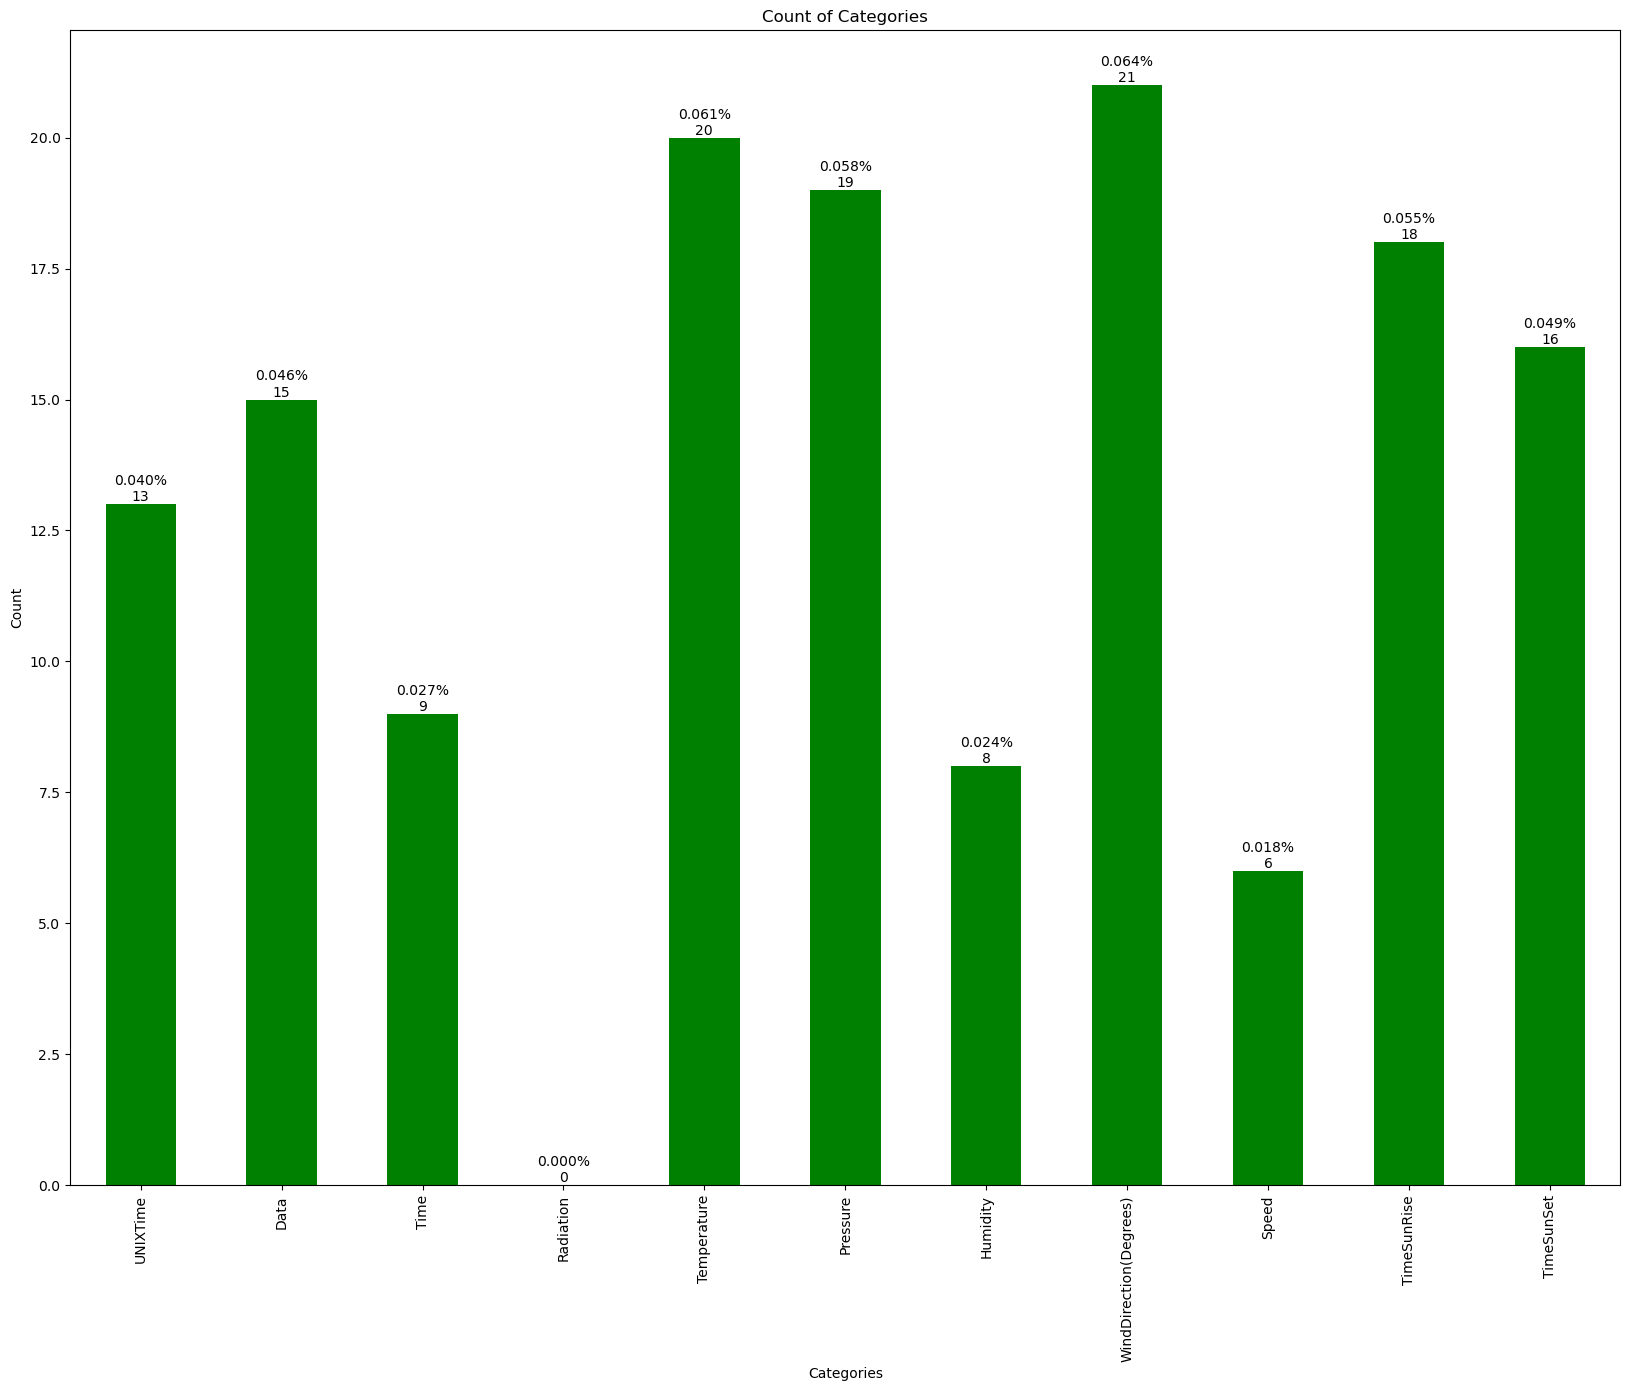

In [9]:
ax = a.plot(kind='bar', legend=False, color='green')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories')
plt.xticks(rotation=90)

total_counts = df.shape[0]

for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height() / total_counts)
    height = p.get_height()
    ax.annotate(f'{percentage}\n{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()


The above graph shows the number of missing values in each column.

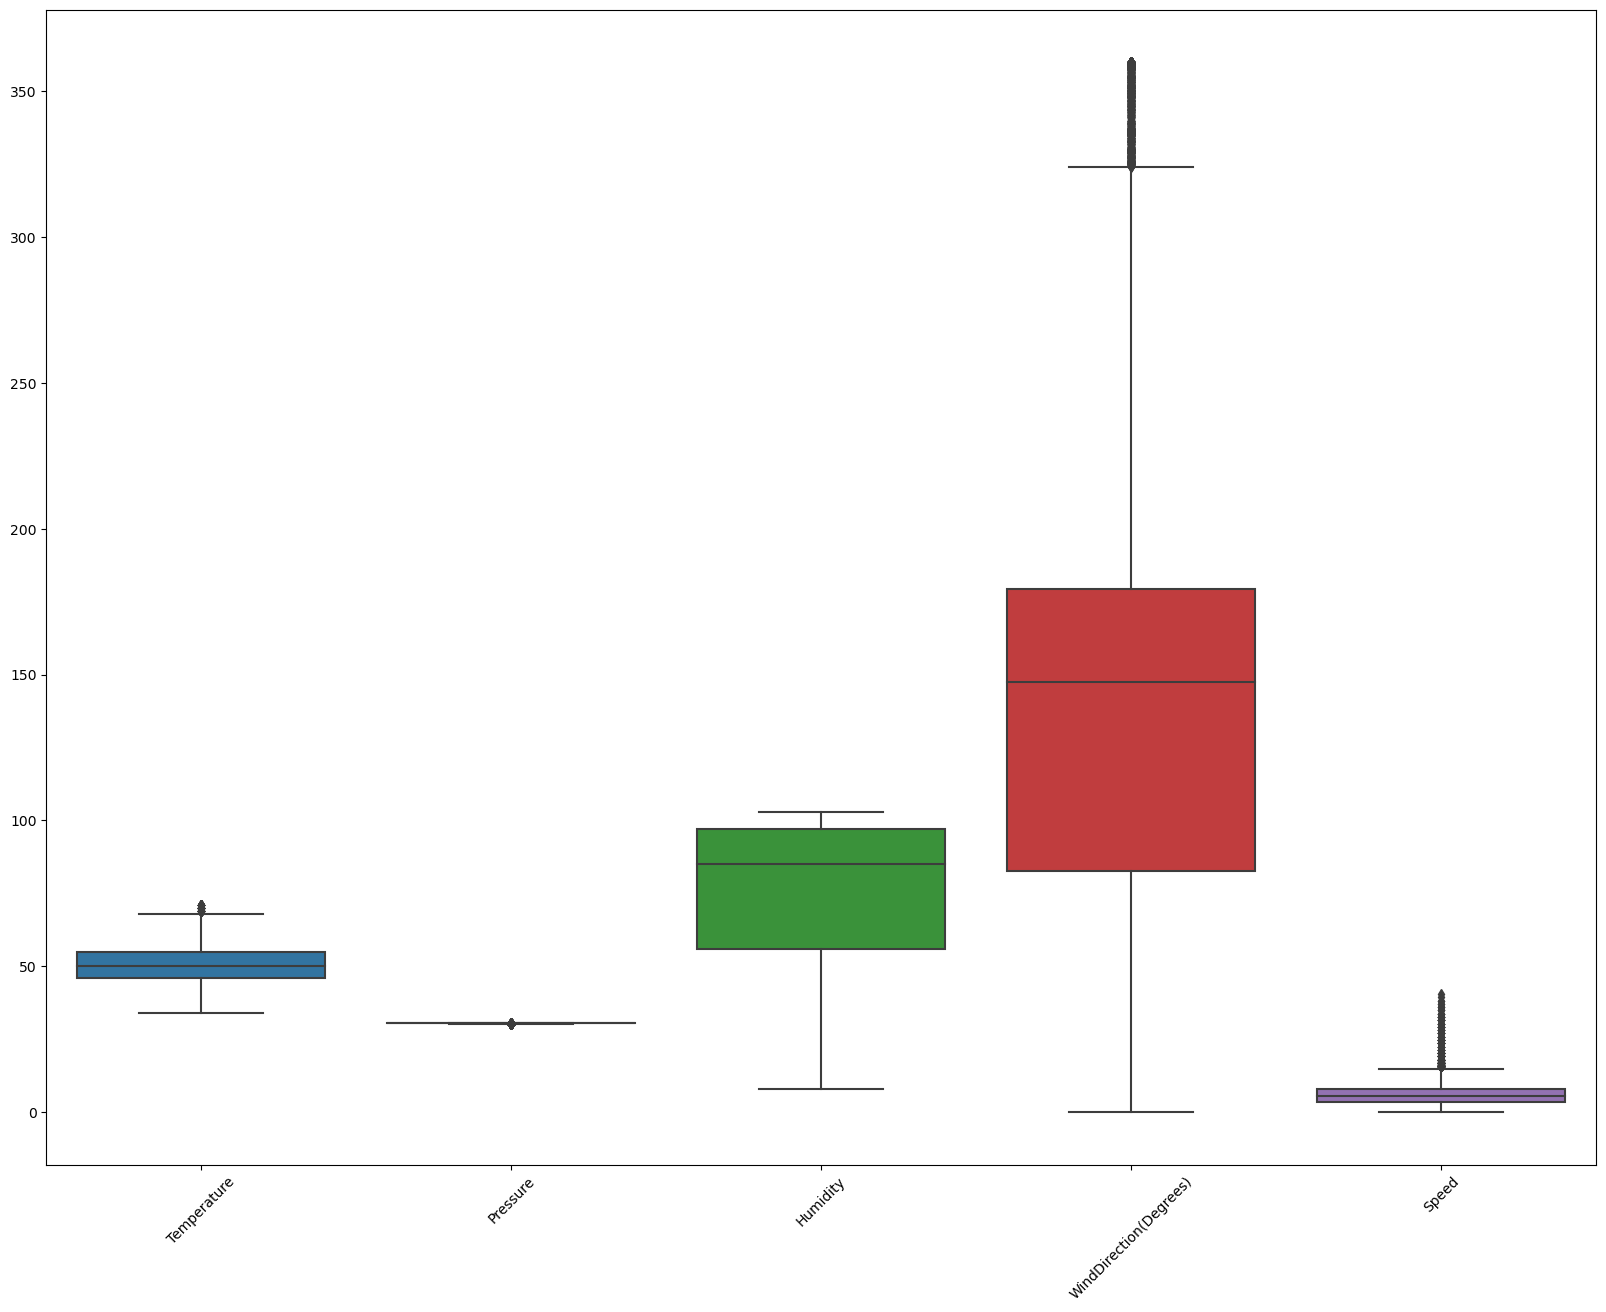

In [10]:
sns.boxplot(df.drop(["UNIXTime","Radiation"],axis=1))
plt.xticks(rotation=45)
plt.show()

### Treating Null values

In [11]:
df.UNIXTime=df.UNIXTime.replace(np.NaN,df.UNIXTime.median())
df.Temperature=df.Temperature.replace(np.NaN,df.Temperature.median())
df.Pressure=df.Pressure.replace(np.NaN,df.Pressure.median())
df.Humidity=df.Humidity.replace(np.NaN,df.Humidity.median())
df['WindDirection(Degrees)']=df['WindDirection(Degrees)'].replace(np.NaN,df['WindDirection(Degrees)'].median())
df.Speed=df.Speed.replace(np.NaN,df.Speed.median())

In [12]:
df.Data=df.Data.replace(np.NaN,df.Data.mode()[0])
df.Time=df.Time.replace(np.NaN,df.Time.mode()[0])
df.TimeSunRise=df.TimeSunRise.replace(np.NaN,df.TimeSunRise.mode()[0])
df.TimeSunSet=df.TimeSunSet.replace(np.NaN,df.TimeSunSet.mode()[0])

In [13]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

### Data Preprocessing
* Conversion of 'UNIXTime' column to a datetime index.
* Localization of the datetime index to UTC timezone and then conversion to the 'Pacific/Honolulu' timezone.
* Creation of new columns for 'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'TimeOfDay(h)', 'TimeOfDay(m)', and 'TimeOfDay(s)' to extract relevant time-based features.
* Conversion of 'TimeSunRise' and 'TimeSunSet' columns to datetime format.
* Calculation of 'DayLength(s)' column, representing the duration of sunlight in seconds for each day.
* Removal of unnecessary columns ('Data', 'Time', 'TimeSunRise', 'TimeSunSet') from the dataset.

In [14]:
hawaii= timezone('Pacific/Honolulu')
df.index =  pd.to_datetime(df['UNIXTime'], unit='s')
df.index = df.index.tz_localize(pytz.utc).tz_convert(hawaii)
df['MonthOfYear'] = df.index.strftime('%m').astype(int)
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df['WeekOfYear'] = df.index.strftime('%U').astype(int)
df['TimeOfDay(h)'] = df.index.hour
df['TimeOfDay(m)'] = df.index.hour*60 + df.index.minute
df['TimeOfDay(s)'] = df.index.hour*60*60 + df.index.minute*60 + df.index.second
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')
df['DayLength(s)'] = df['TimeSunSet'].dt.hour*60*60 \
                           + df['TimeSunSet'].dt.minute*60 \
                           + df['TimeSunSet'].dt.second \
                           - df['TimeSunRise'].dt.hour*60*60 \
                           - df['TimeSunRise'].dt.minute*60 \
                           - df['TimeSunRise'].dt.second
df.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
df.head()


UNIXTime  Radiation  Temperature  Pressure  \
UNIXTime                                                                    
2016-09-29 23:55:26-10:00  1.475229e+09       1.21         48.0     30.46   
2016-09-29 23:50:23-10:00  1.475229e+09       1.21         48.0     30.46   
2016-09-29 23:45:26-10:00  1.475229e+09       1.23         48.0     30.46   
2016-09-29 23:40:21-10:00  1.475228e+09       1.21         48.0     30.46   
2016-09-29 23:35:24-10:00  1.475228e+09       1.17         48.0     30.46   

                           Humidity  WindDirection(Degrees)  Speed  \
UNIXTime                                                             
2016-09-29 23:55:26-10:00      59.0                  177.39   5.62   
2016-09-29 23:50:23-10:00      58.0                  176.78   3.37   
2016-09-29 23:45:26-10:00      57.0                  158.75   3.37   
2016-09-29 23:40:21-10:00      60.0                  137.71   3.37   
2016-09-29 23:35:24-10:00      62.0                  104.95   5.62   

                           MonthOfYear  DayOfYear  WeekOfYear  TimeOfDay(h)  \
UNIXTime                                                                      
2016-09-29 23:55:26-10:00            9        273          39            23   
2016-09-29 23:50:23-10:00            9        273          39            23   
2016-09-29 23:45:26-10:00            9        273          39            23   
2016-09-29 23:40:21-10:00            9        273          39            23   
2016-09-29 23:35:24-10:00            9        273          39            23   

                           TimeOfDay(m)  TimeOfDay(s)  DayLength(s)  
UNIXTime                                                             
2016-09-29 23:55:26-10:00          1435         86126         43200  
2016-09-29 23:50:23-10:00          1430         85823         43200  
2016-09-29 23:45:26-10:00          1425         85526         43200  
2016-09-29 23:40:21-10:00          1420         85221         43200  
2016-09-29 23:35:24-10:00          1415         84924         43200

In [15]:
df1=df.copy()

## EDA


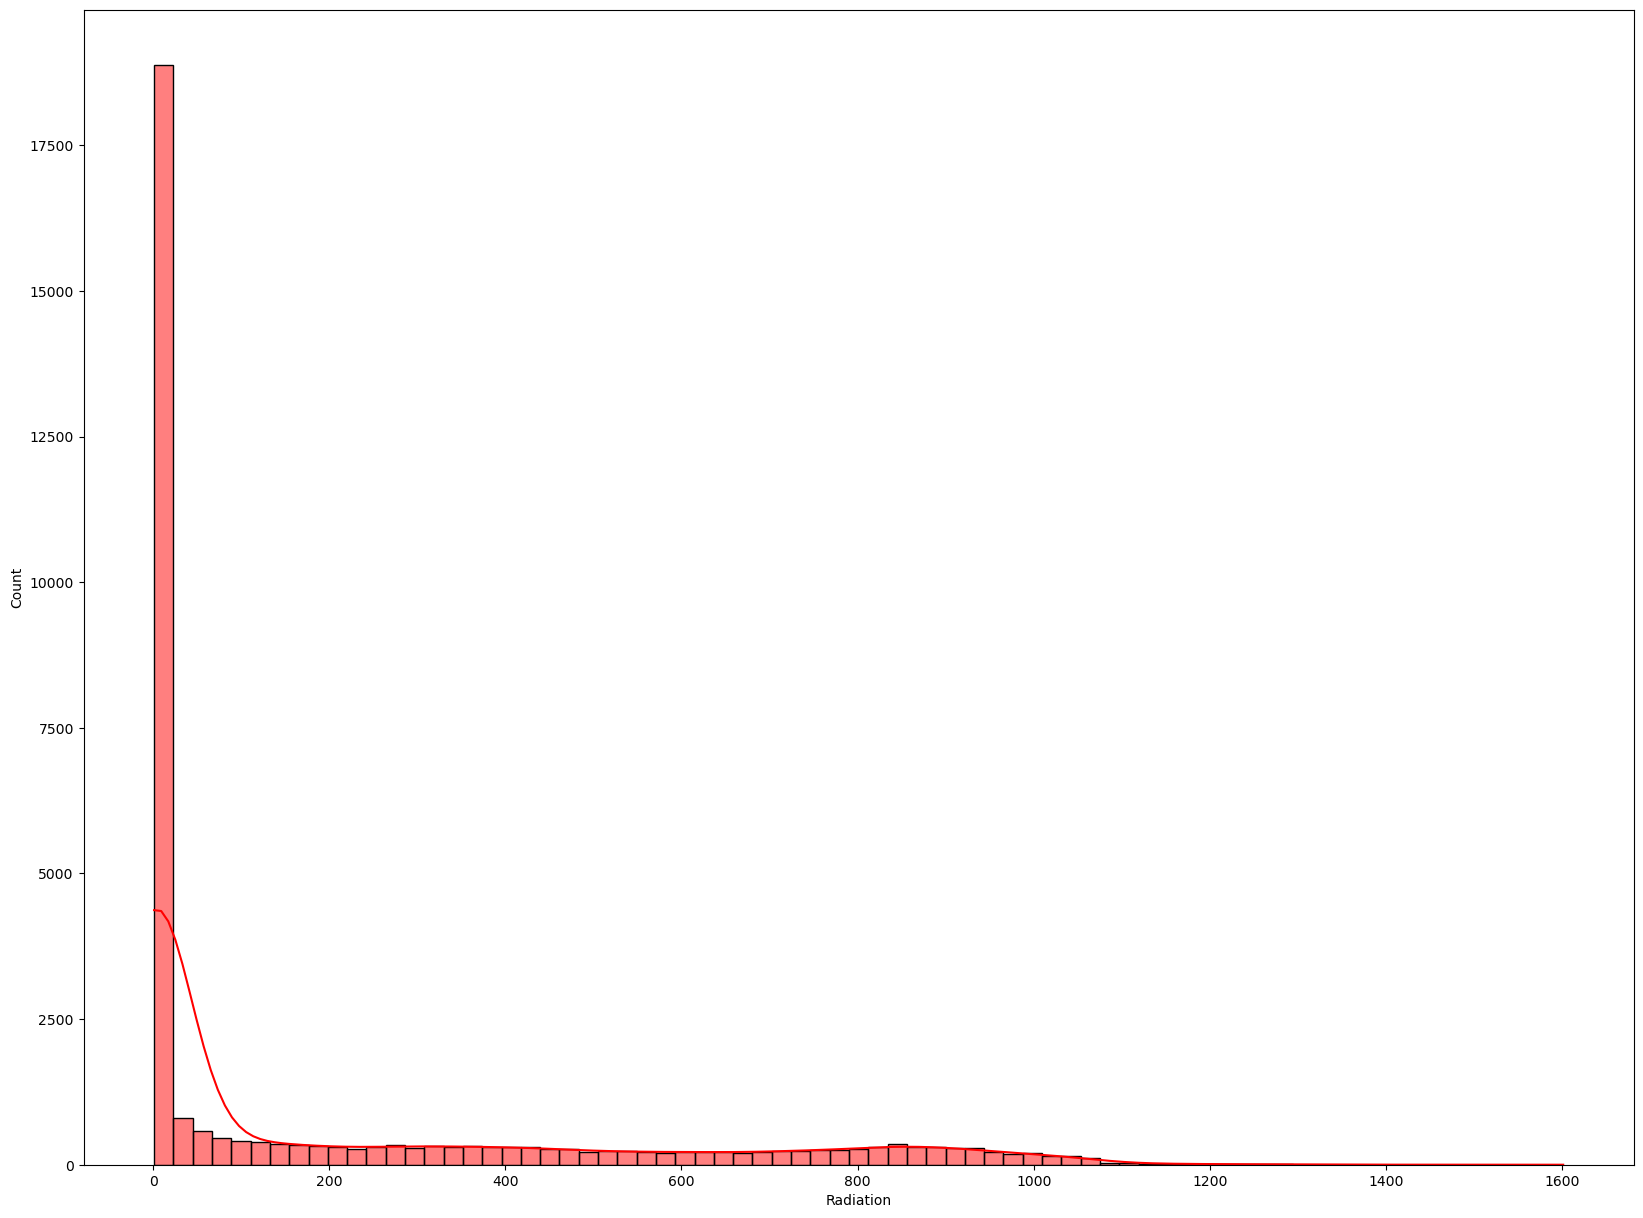

In [16]:
sns.histplot(df.Radiation,kde=True,color='red')
plt.show()

The above graph tells us that the dependent variable is positively skewed.

In [17]:
df.Radiation.skew()

1.3748637743615963

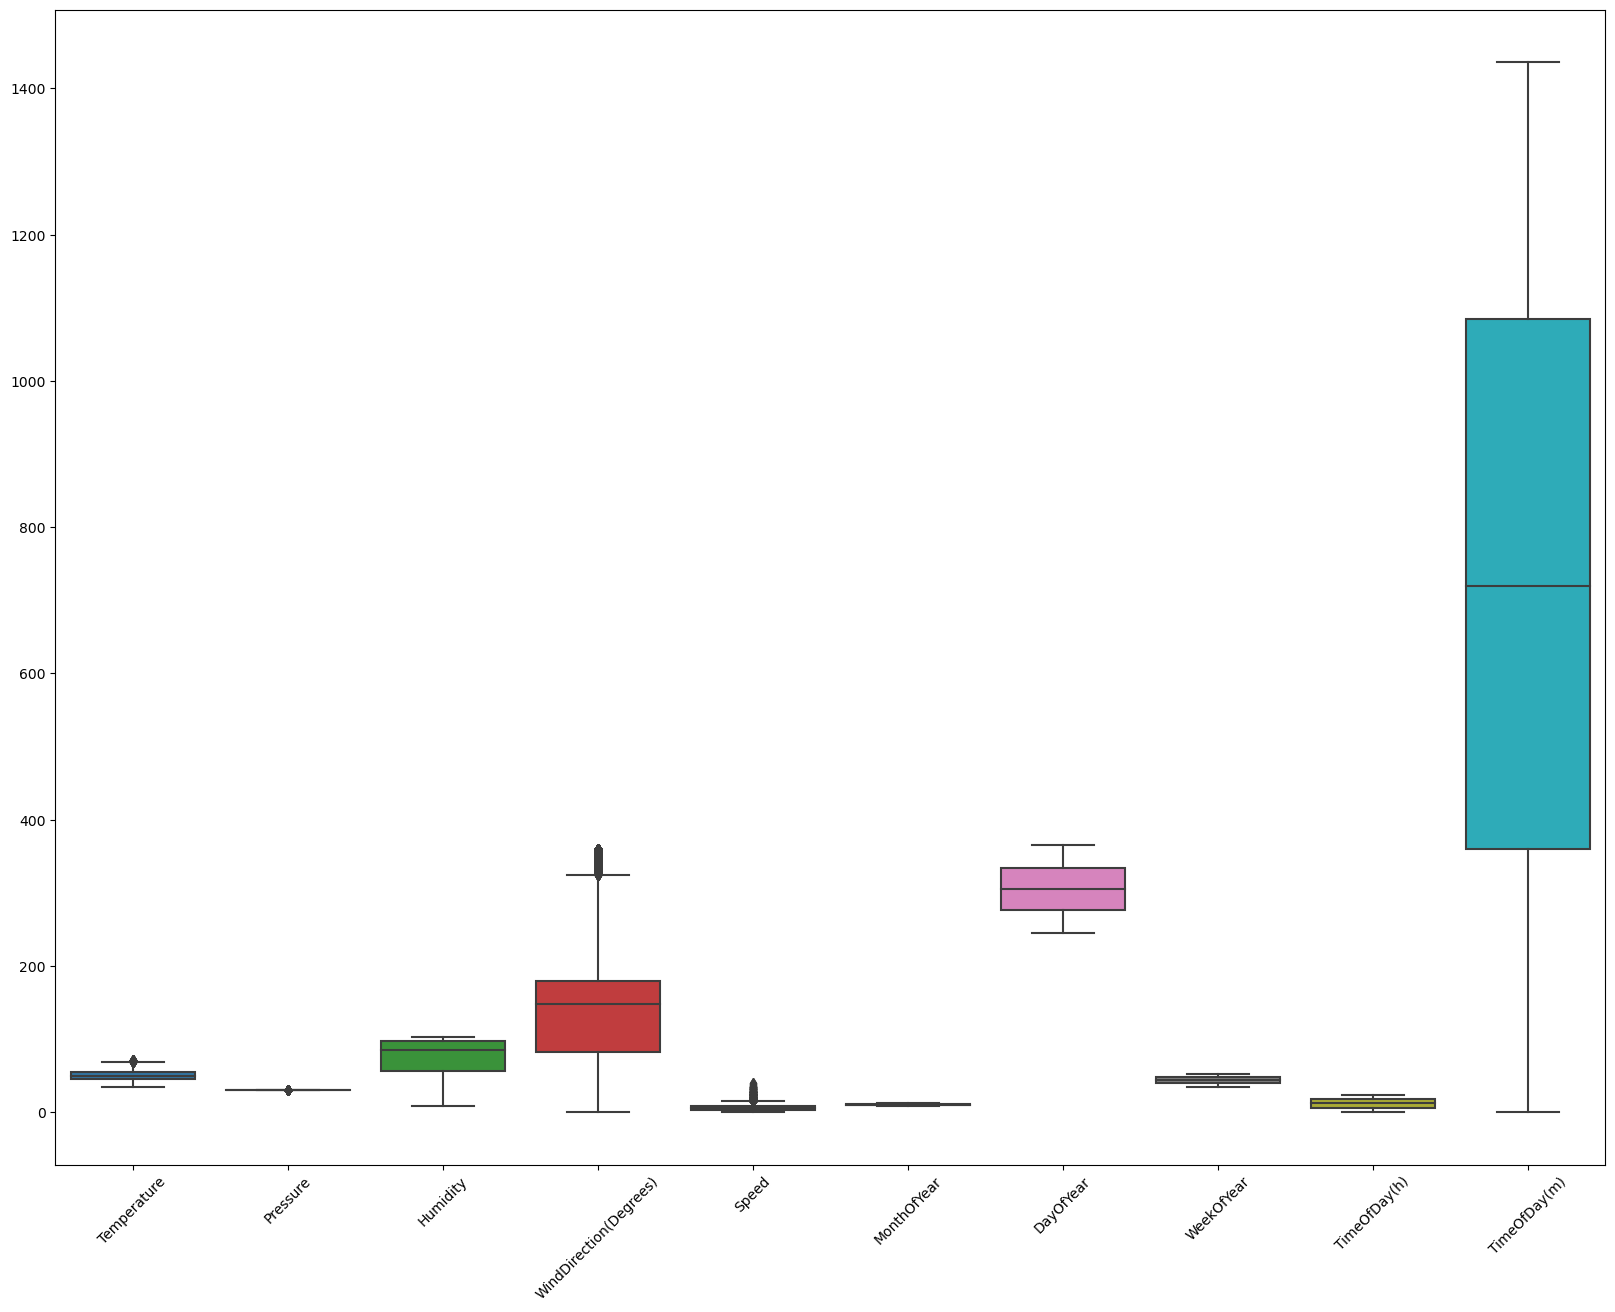

In [18]:
sns.boxplot(df.drop(["UNIXTime","Radiation","TimeOfDay(s)","DayLength(s)"],axis=1))
plt.xticks(rotation=45)
plt.show()

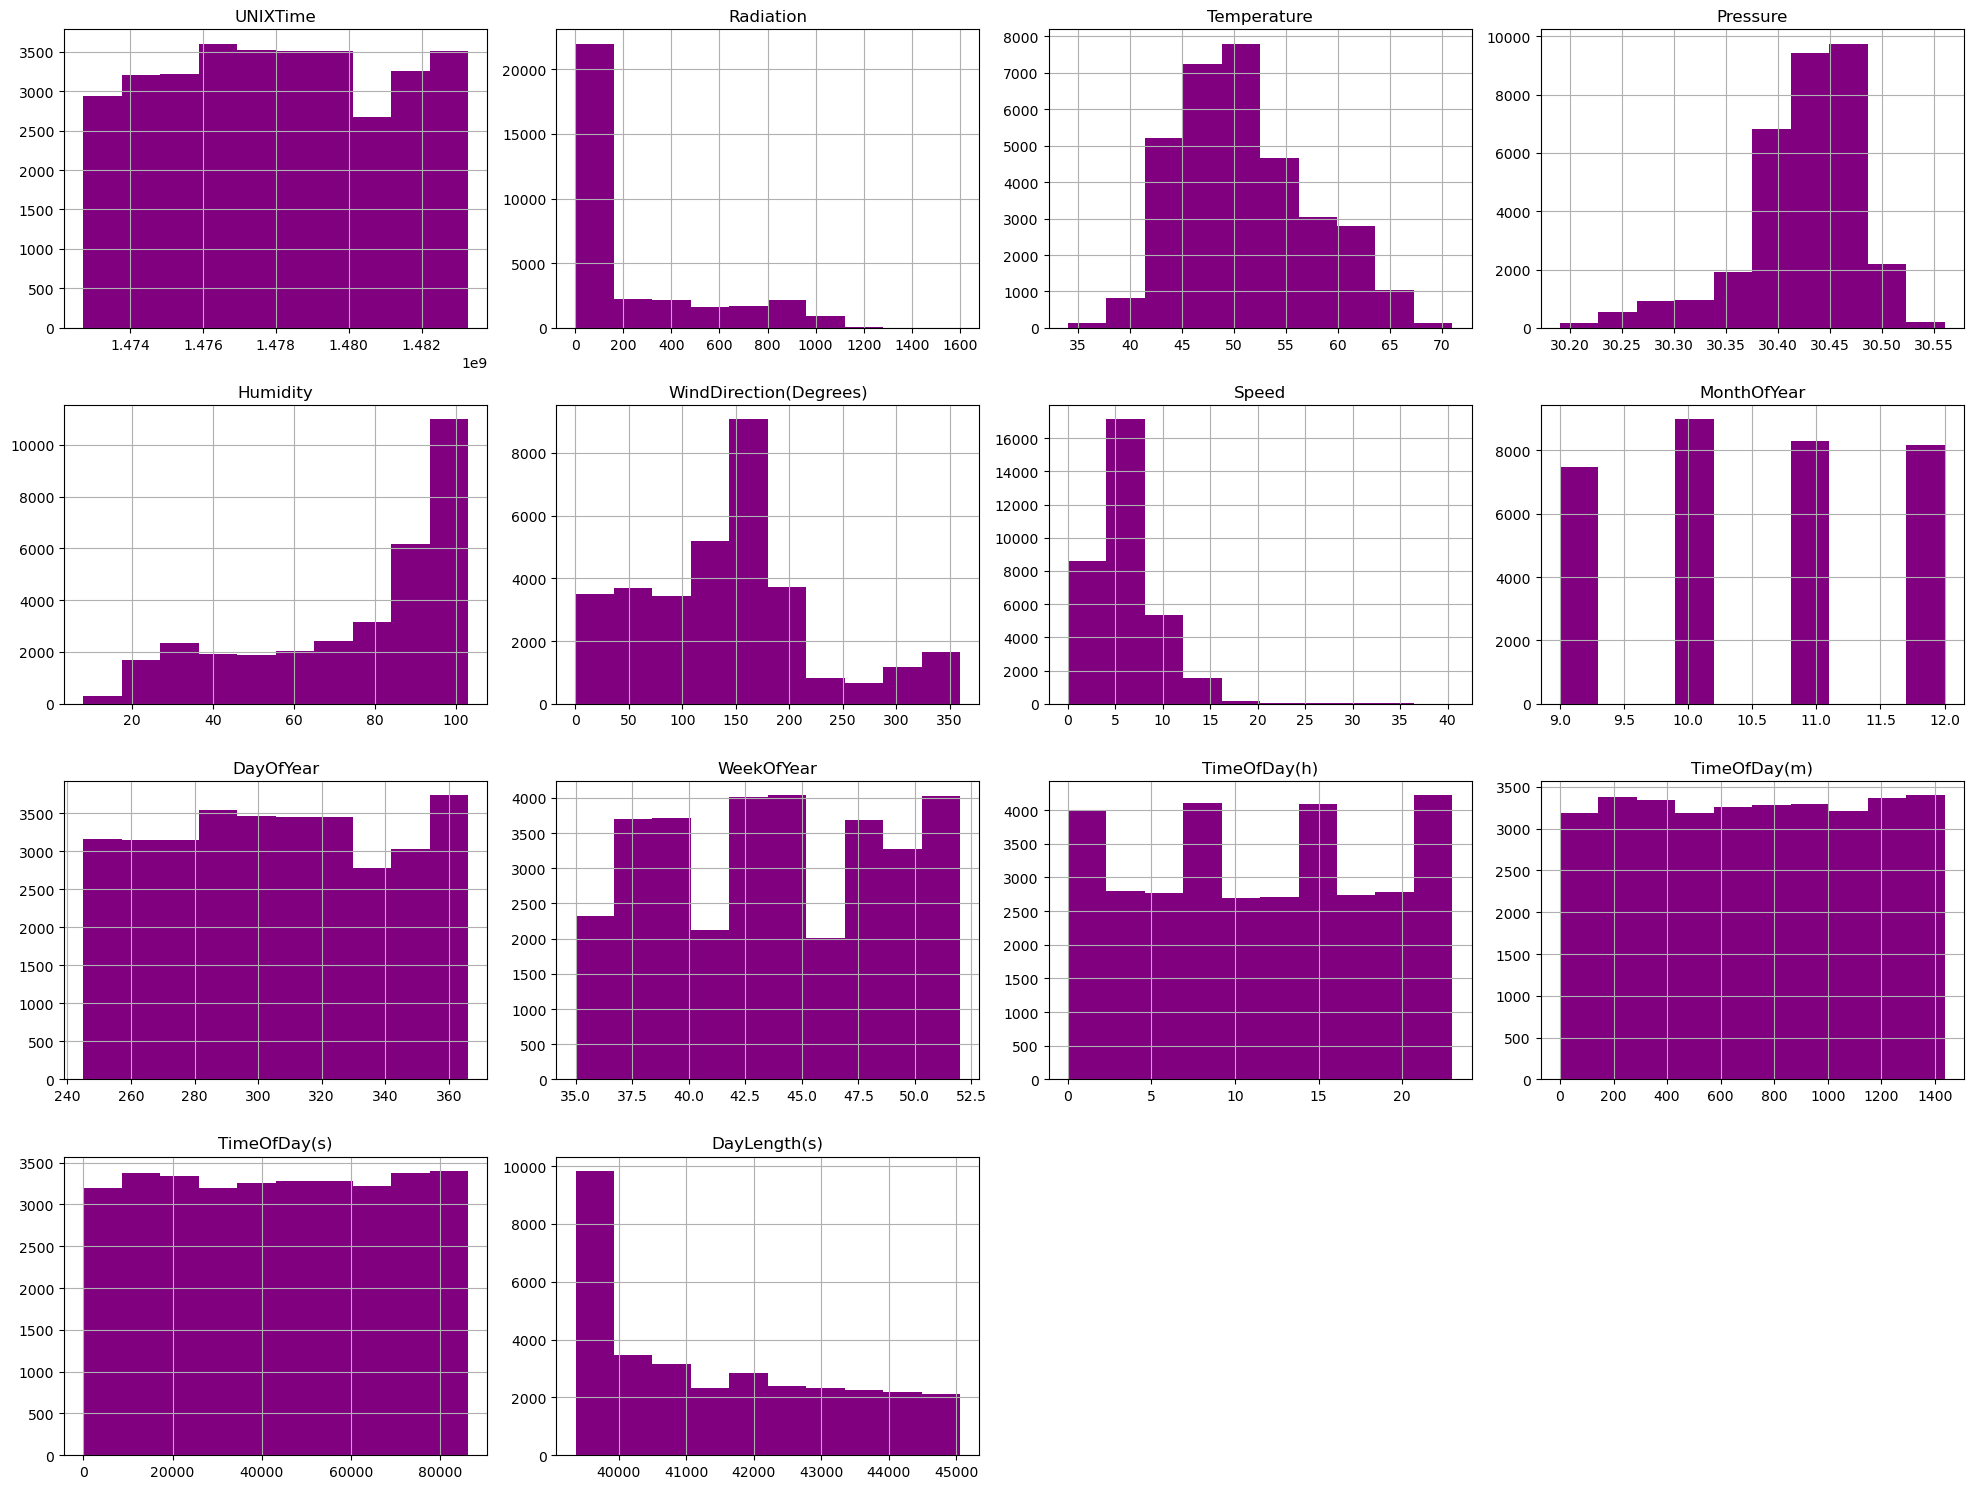

In [19]:
df.hist(color='purple')
plt.tight_layout()
plt.show()

In [20]:
df.skew()

UNIXTime                  0.020496
Radiation                 1.374864
Temperature               0.523981
Pressure                 -1.231953
Humidity                 -0.783585
WindDirection(Degrees)    0.571066
Speed                     1.472087
MonthOfYear              -0.004976
DayOfYear                 0.020425
WeekOfYear                0.014089
TimeOfDay(h)             -0.001285
TimeOfDay(m)             -0.000599
TimeOfDay(s)             -0.000579
DayLength(s)              0.446726
dtype: float64

The given plots show that none of the data is normally distributed.

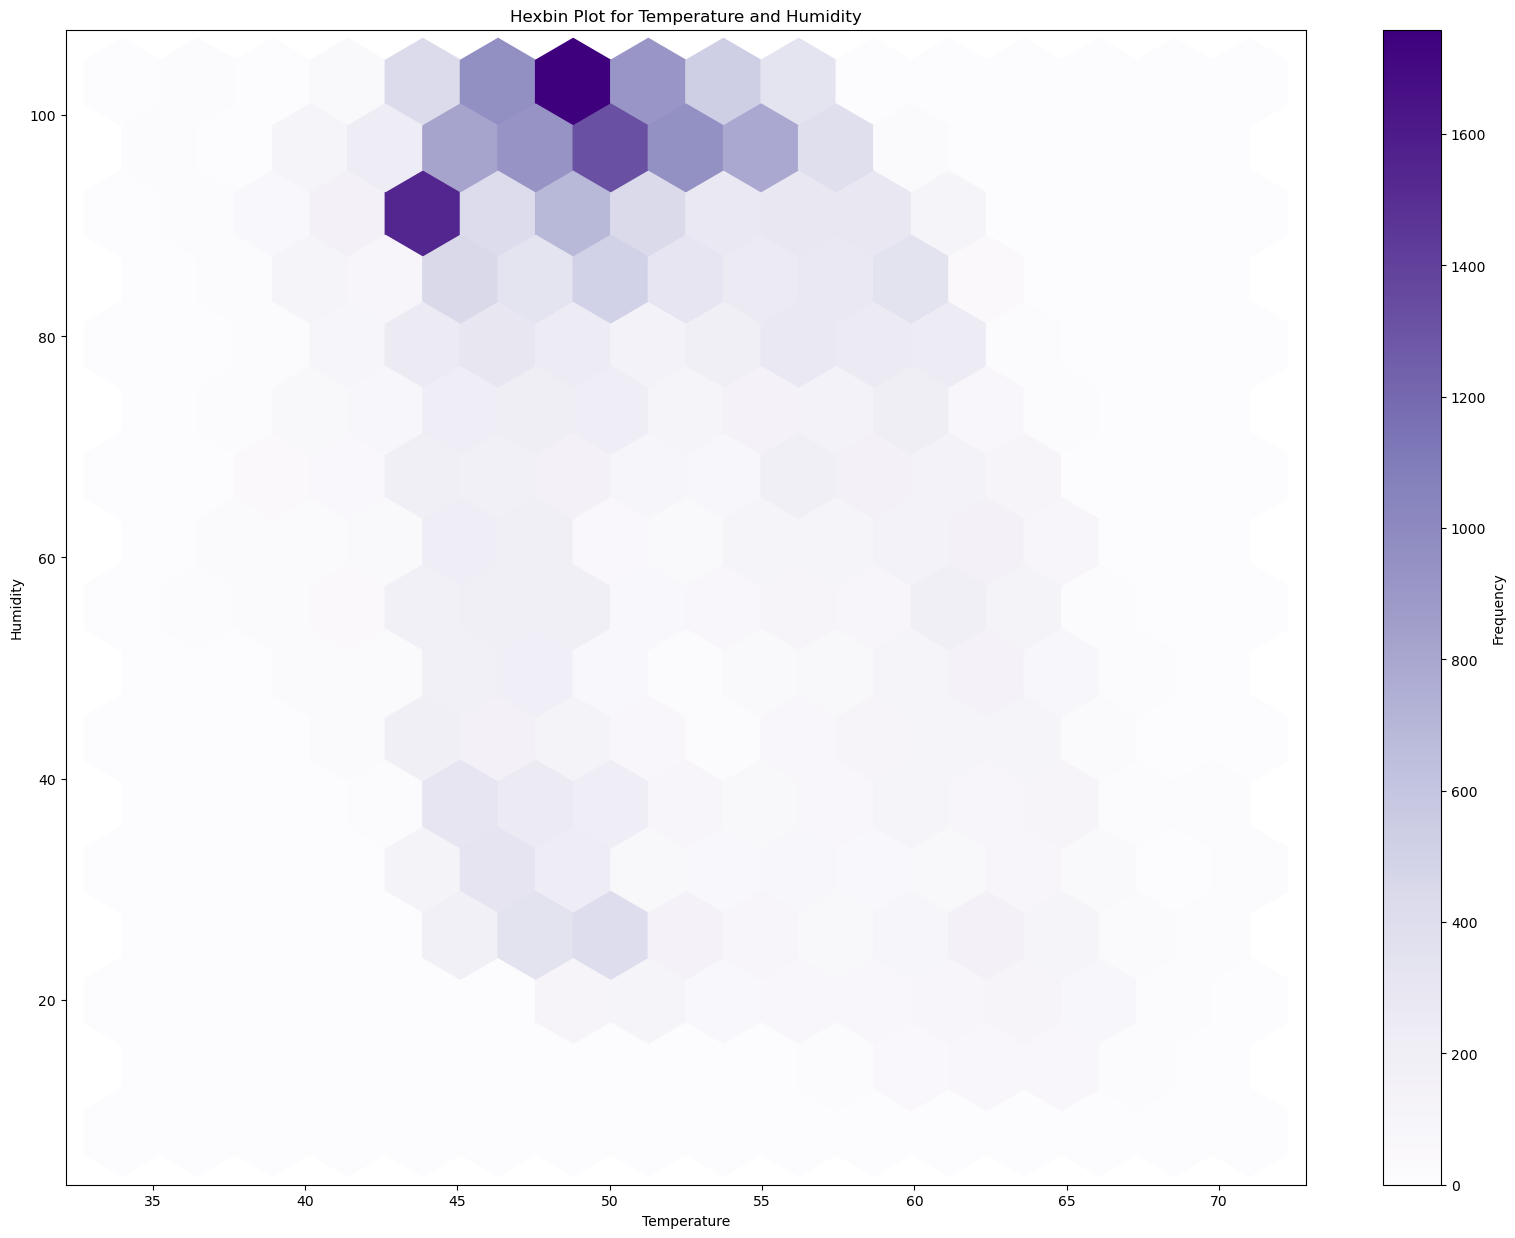

In [21]:
plt.hexbin(x=df['Temperature'], y=df['Humidity'], gridsize=15, cmap='Purples')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Hexbin Plot for Temperature and Humidity')
plt.colorbar(label='Frequency')
plt.show()


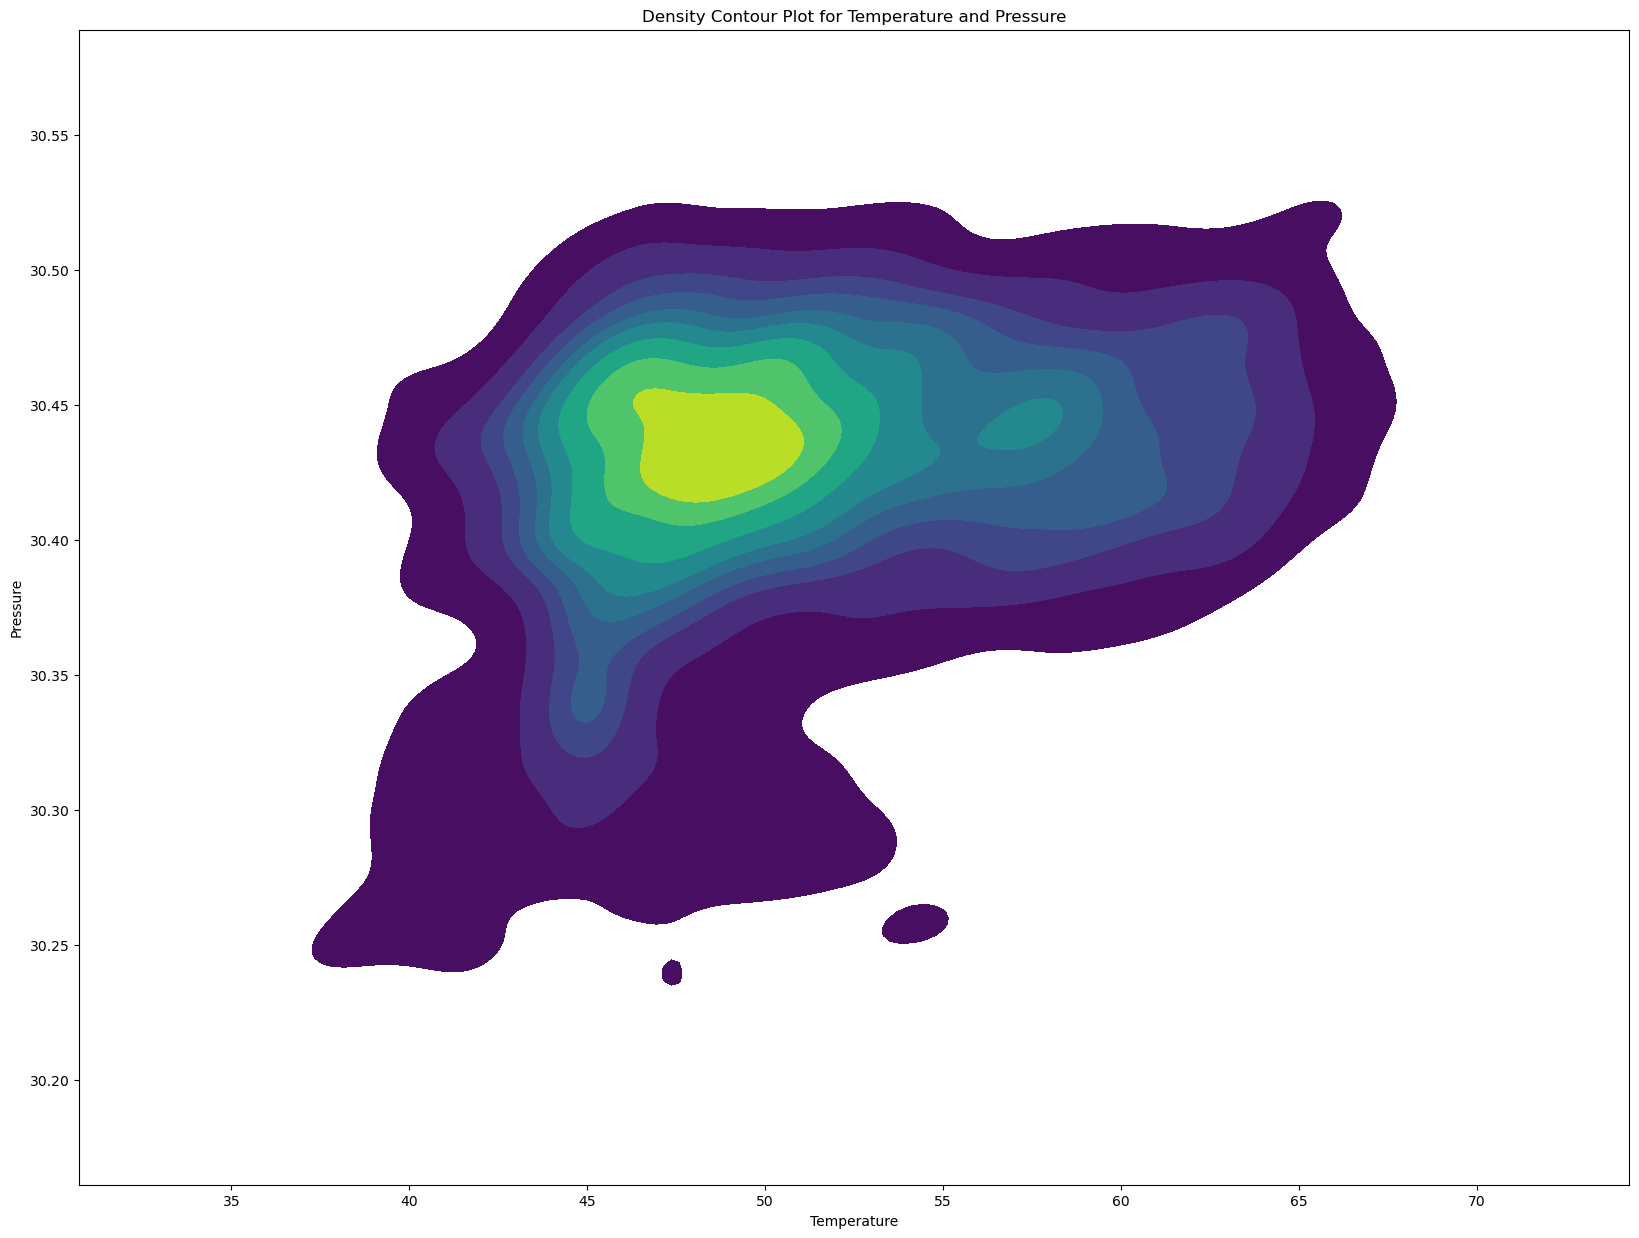

In [22]:
sns.kdeplot(x=df['Temperature'], y=df['Pressure'], cmap='viridis', fill=True, levels=10)
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Density Contour Plot for Temperature and Pressure')
plt.show()


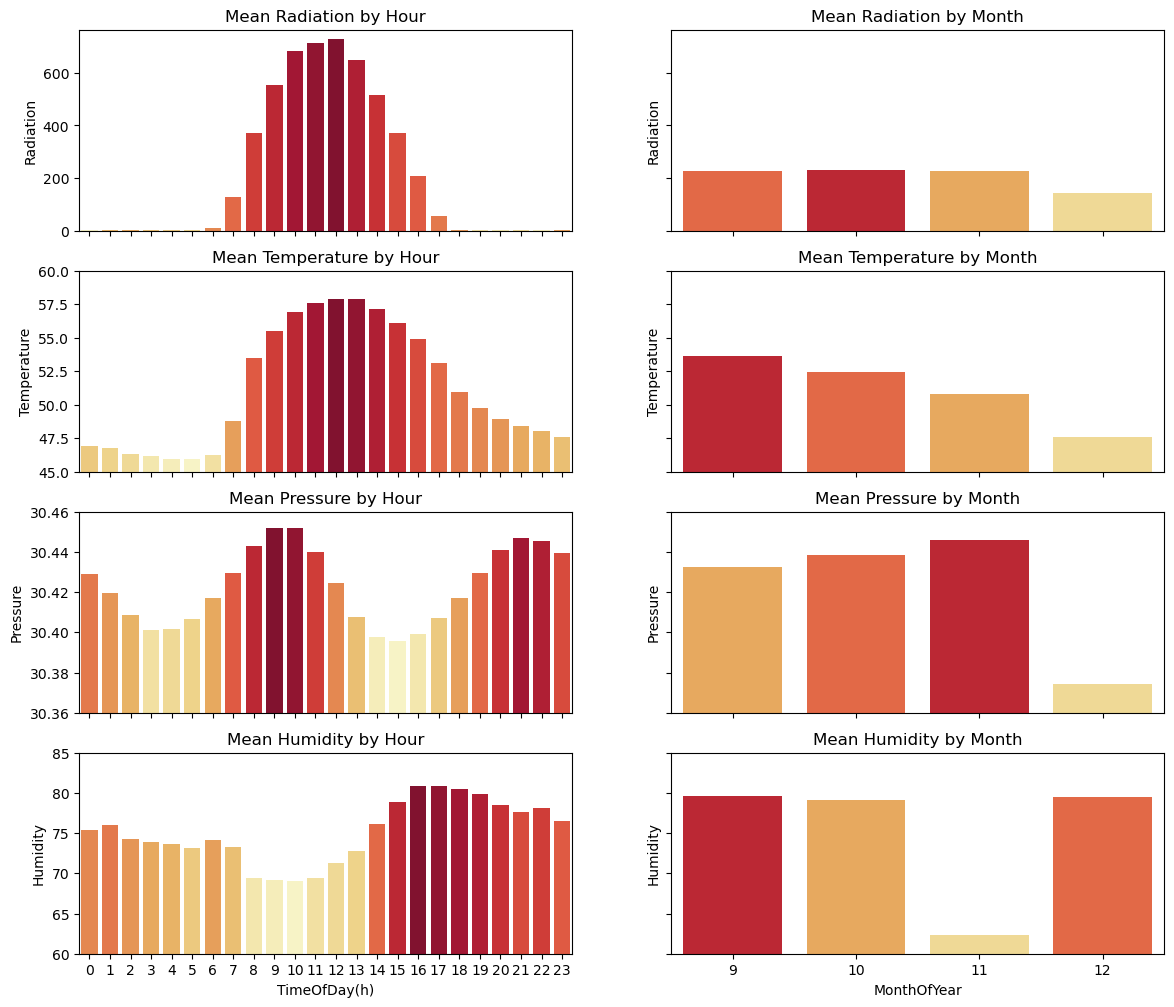

In [23]:
grouped_m=df.groupby('MonthOfYear').mean().reset_index()
grouped_w=df.groupby('WeekOfYear').mean().reset_index()
grouped_d=df.groupby('DayOfYear').mean().reset_index()
grouped_h=df.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

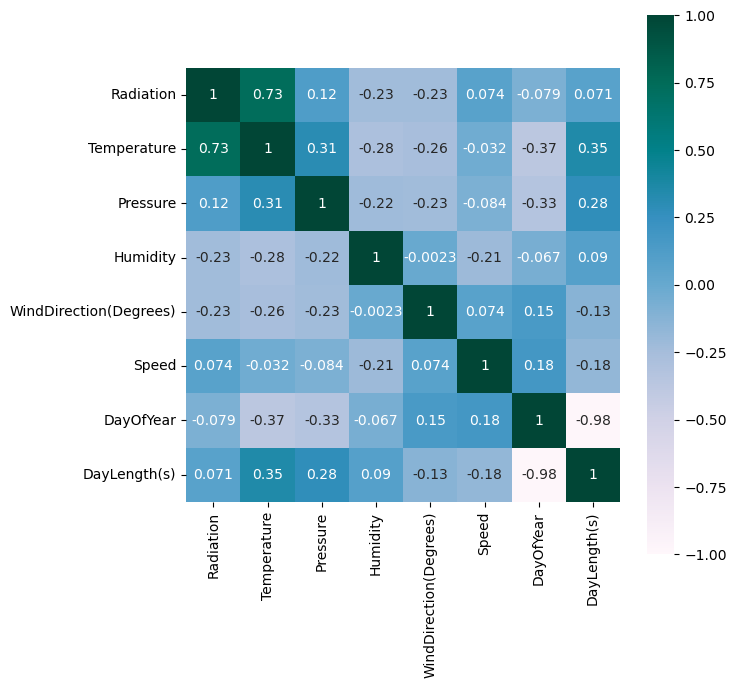

In [24]:
corrmat = df.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-1.0, vmax=1.0, square=True, cmap = 'PuBuGn',annot=True)
plt.show()

### Building the model

In [25]:
X = df[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = df['Radiation']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

Features  r2 Score
0  Temperature, Pressure, Humidity, WindDirection...  0.932635
1  Temperature, Humidity, WindDirection(Degrees),...  0.931571
2     Temperature, Humidity, DayOfYear, TimeOfDay(s)  0.933502
3               Temperature, DayOfYear, TimeOfDay(s)  0.930900
4                          Temperature, TimeOfDay(s)  0.802627

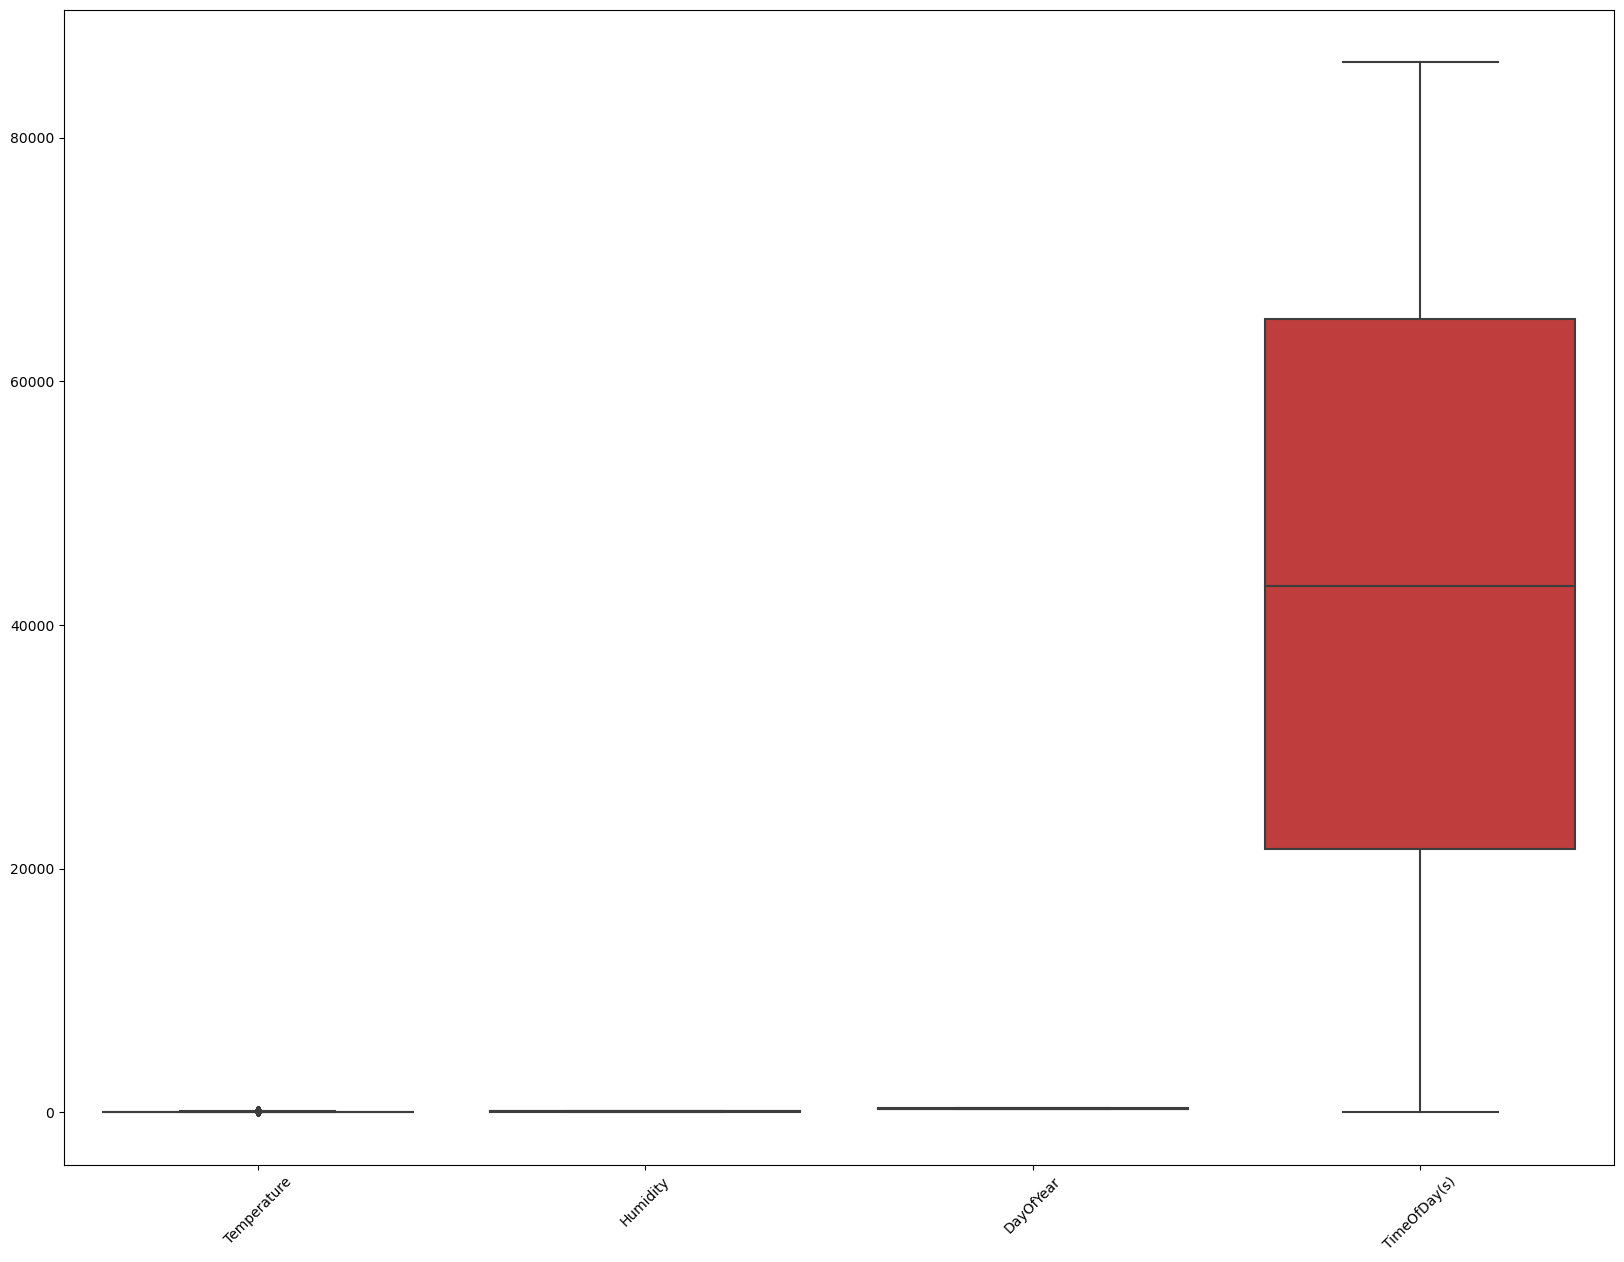

In [29]:
sns.boxplot(df[["Temperature","Humidity","DayOfYear","TimeOfDay(s)"]])
plt.xticks(rotation=45)
plt.show()

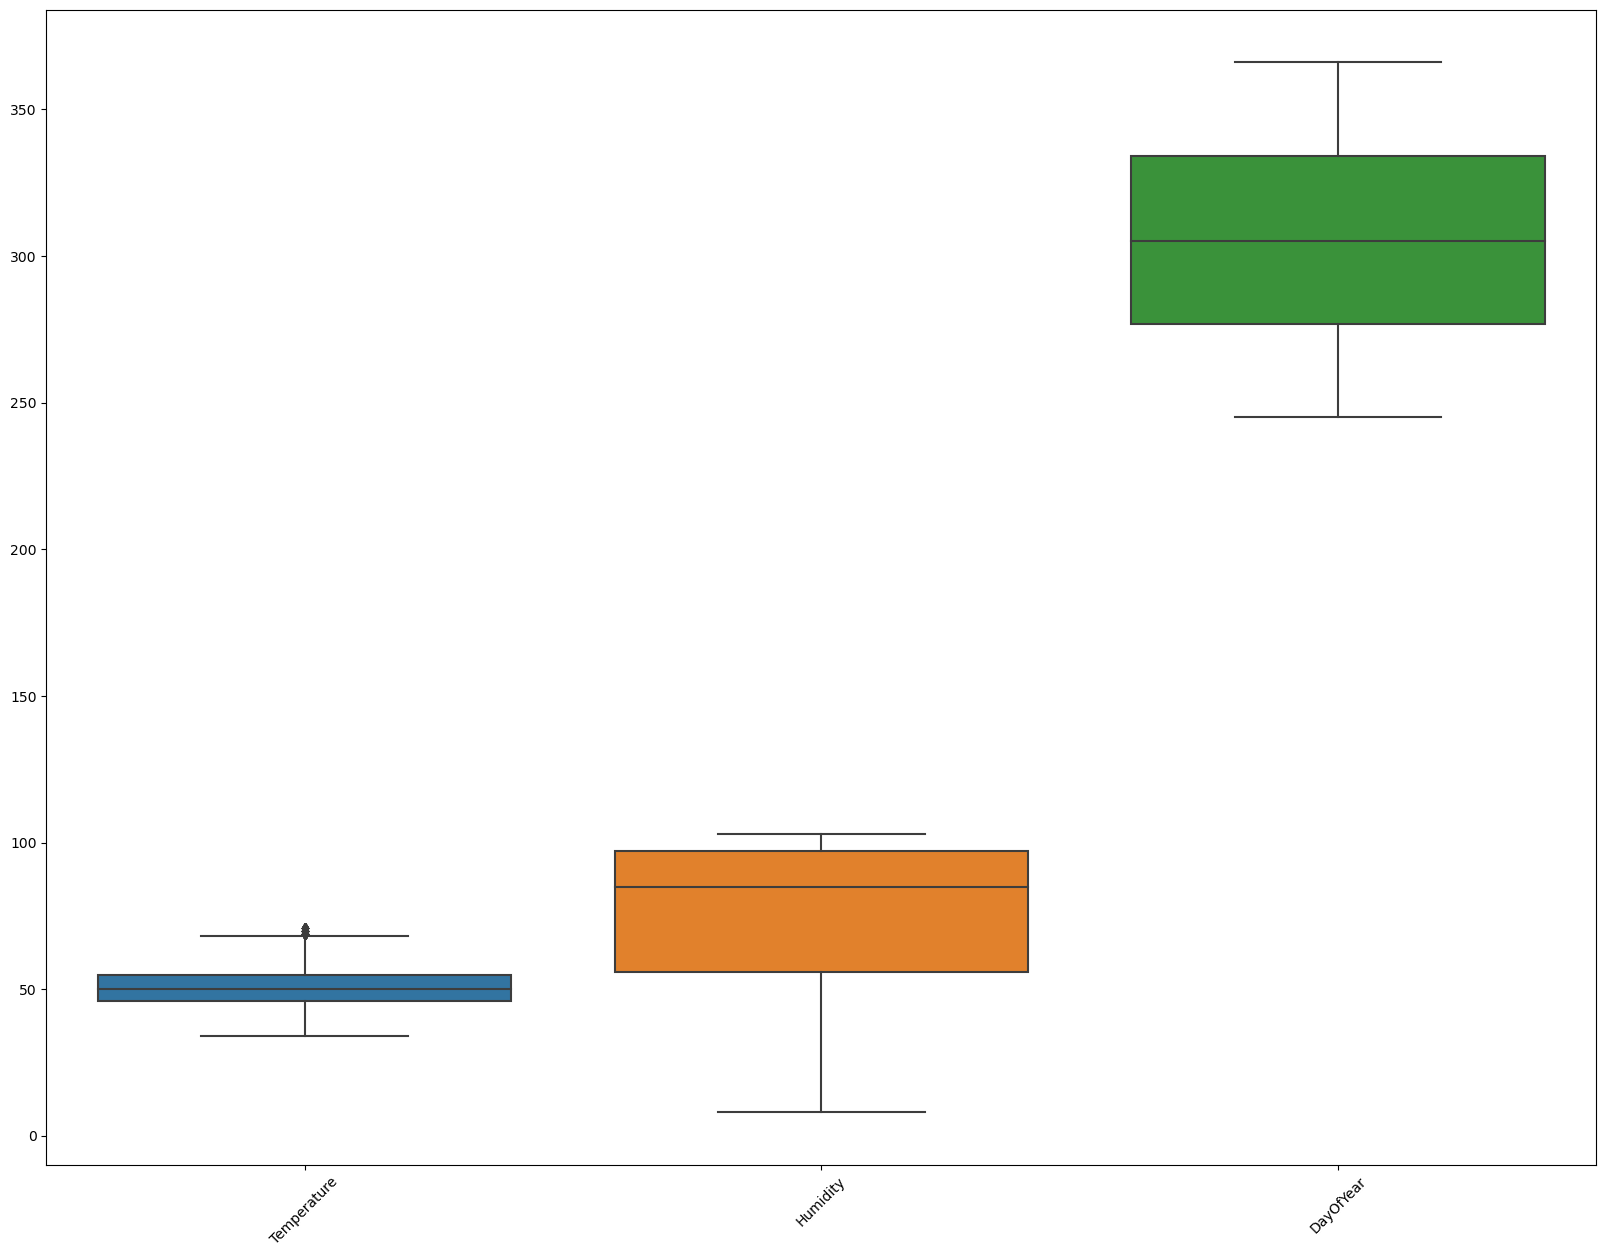

In [30]:
sns.boxplot(df[["Temperature","Humidity","DayOfYear"]])
plt.xticks(rotation=45)
plt.show()

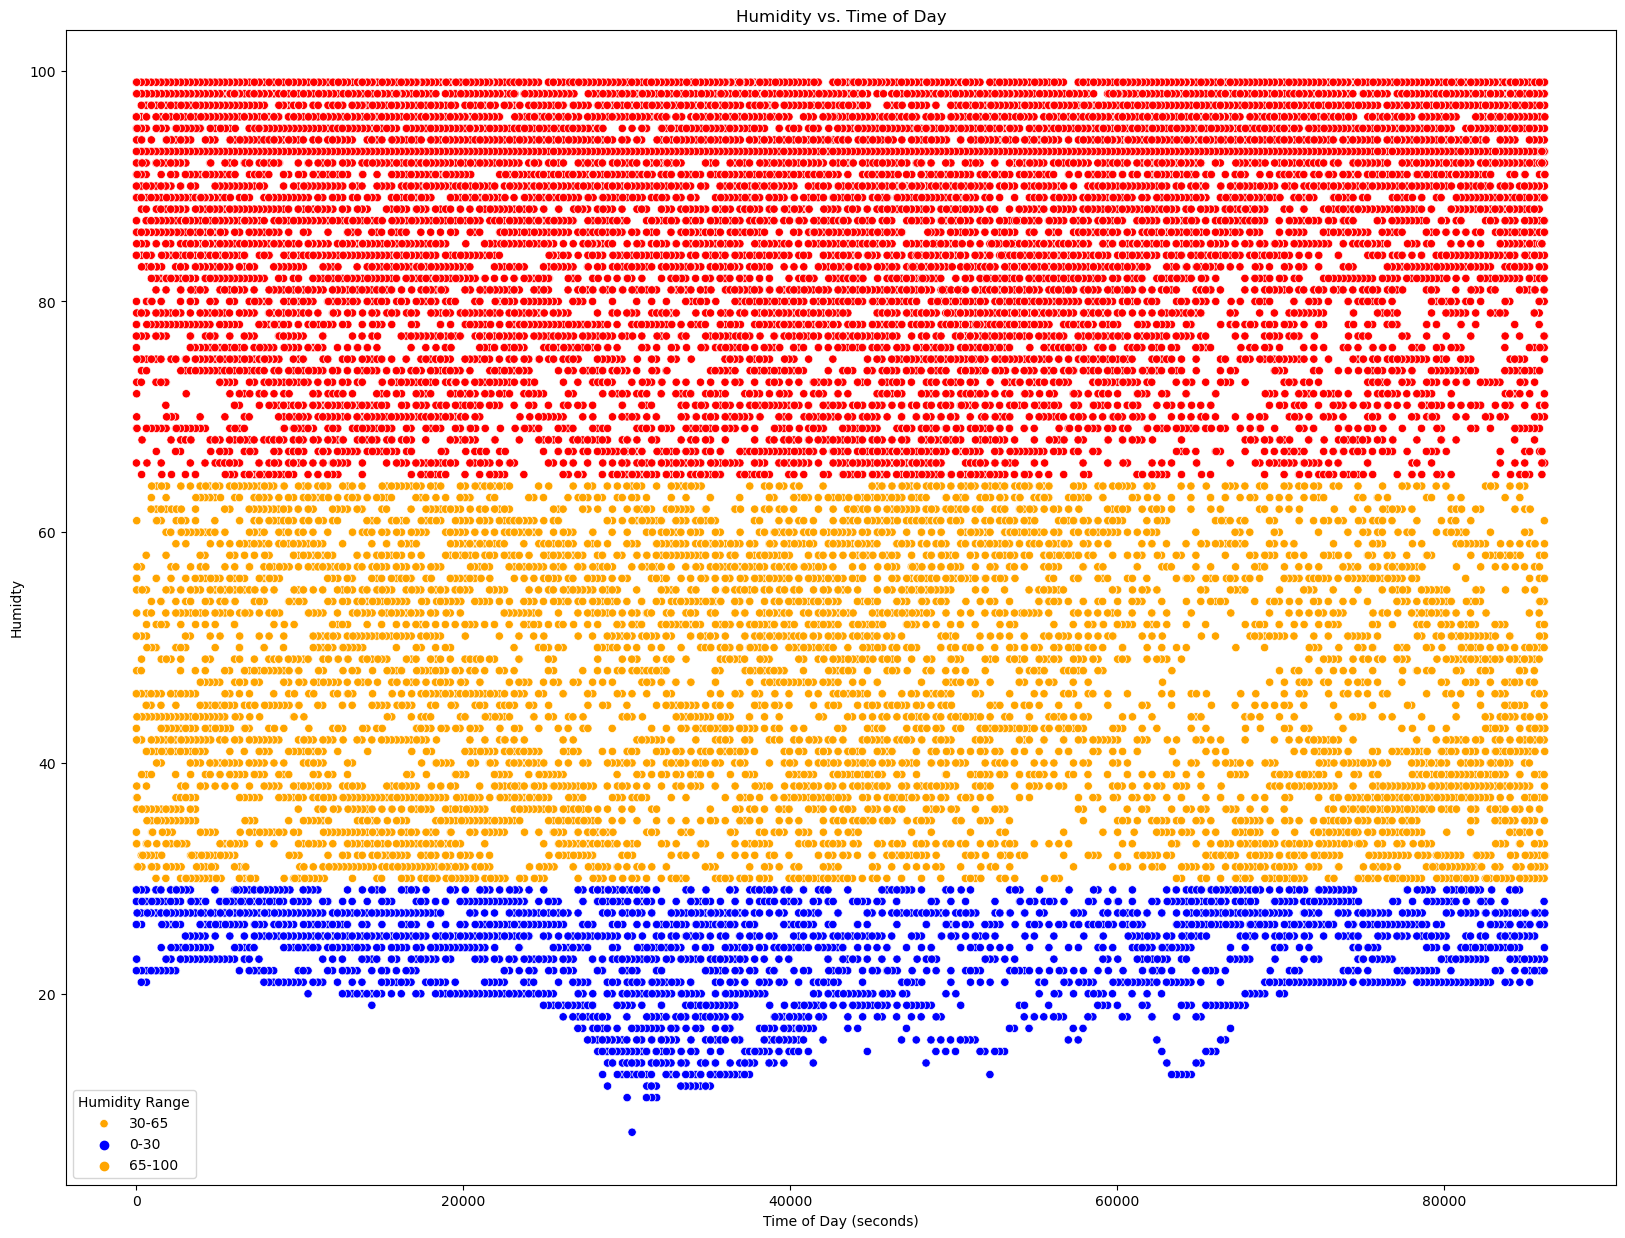

In [31]:
dfh=df.copy()
Humidity_ranges = [(0, 30), (30, 65), (65, 100)]
colors = ['blue', 'orange', 'red']
dfh['HumRange'] = pd.cut(dfh['Humidity'], bins=[0,30,65,100], labels=False, right=False)
sns.scatterplot(x='TimeOfDay(s)', y='Humidity', hue='HumRange', data=dfh, palette=colors)
plt.xlabel('Time of Day (seconds)')
plt.ylabel('Humidty')
plt.title('Humidity vs. Time of Day')
plt.legend(title='Humidity Range', labels=[ '30-65','0-30', '65-100'])
plt.show()

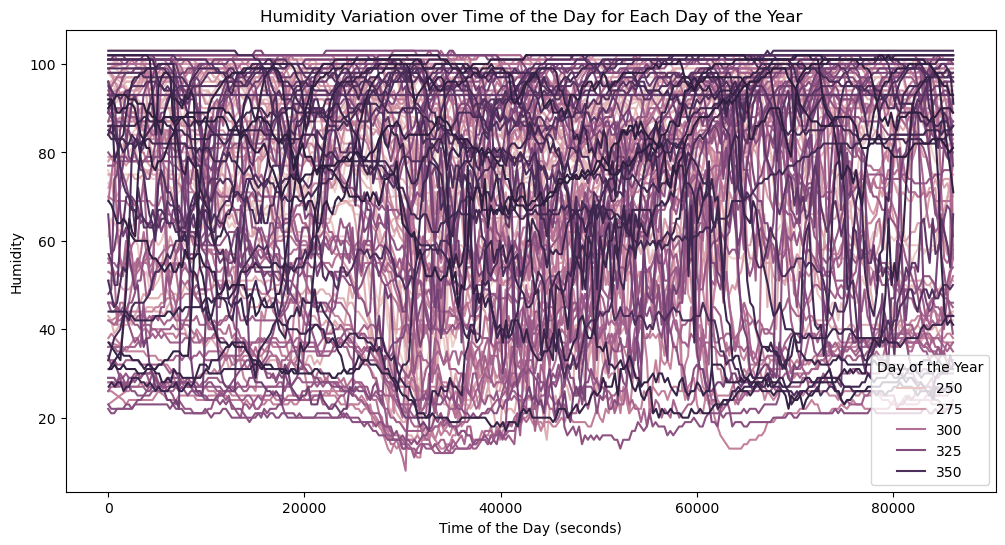

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='TimeOfDay(s)', y='Humidity', hue='DayOfYear', data=dfh)
plt.xlabel('Time of the Day (seconds)')
plt.ylabel('Humidity')
plt.title('Humidity Variation over Time of the Day for Each Day of the Year')
plt.legend(title='Day of the Year')
plt.show()

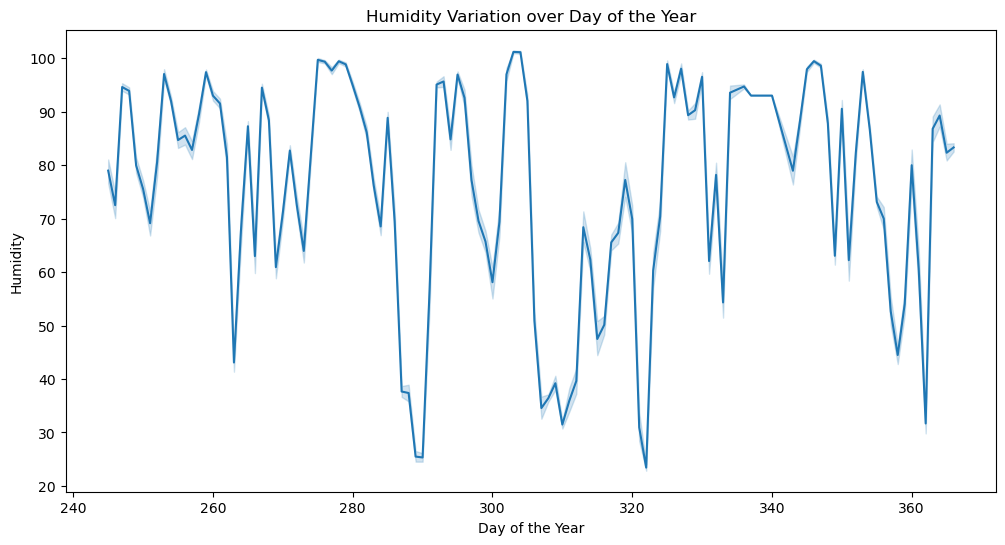

In [69]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DayOfYear', y='Humidity', data=dfh)
plt.xlabel('Day of the Year')
plt.ylabel('Humidity')
plt.title('Humidity Variation over Day of the Year')
plt.show()


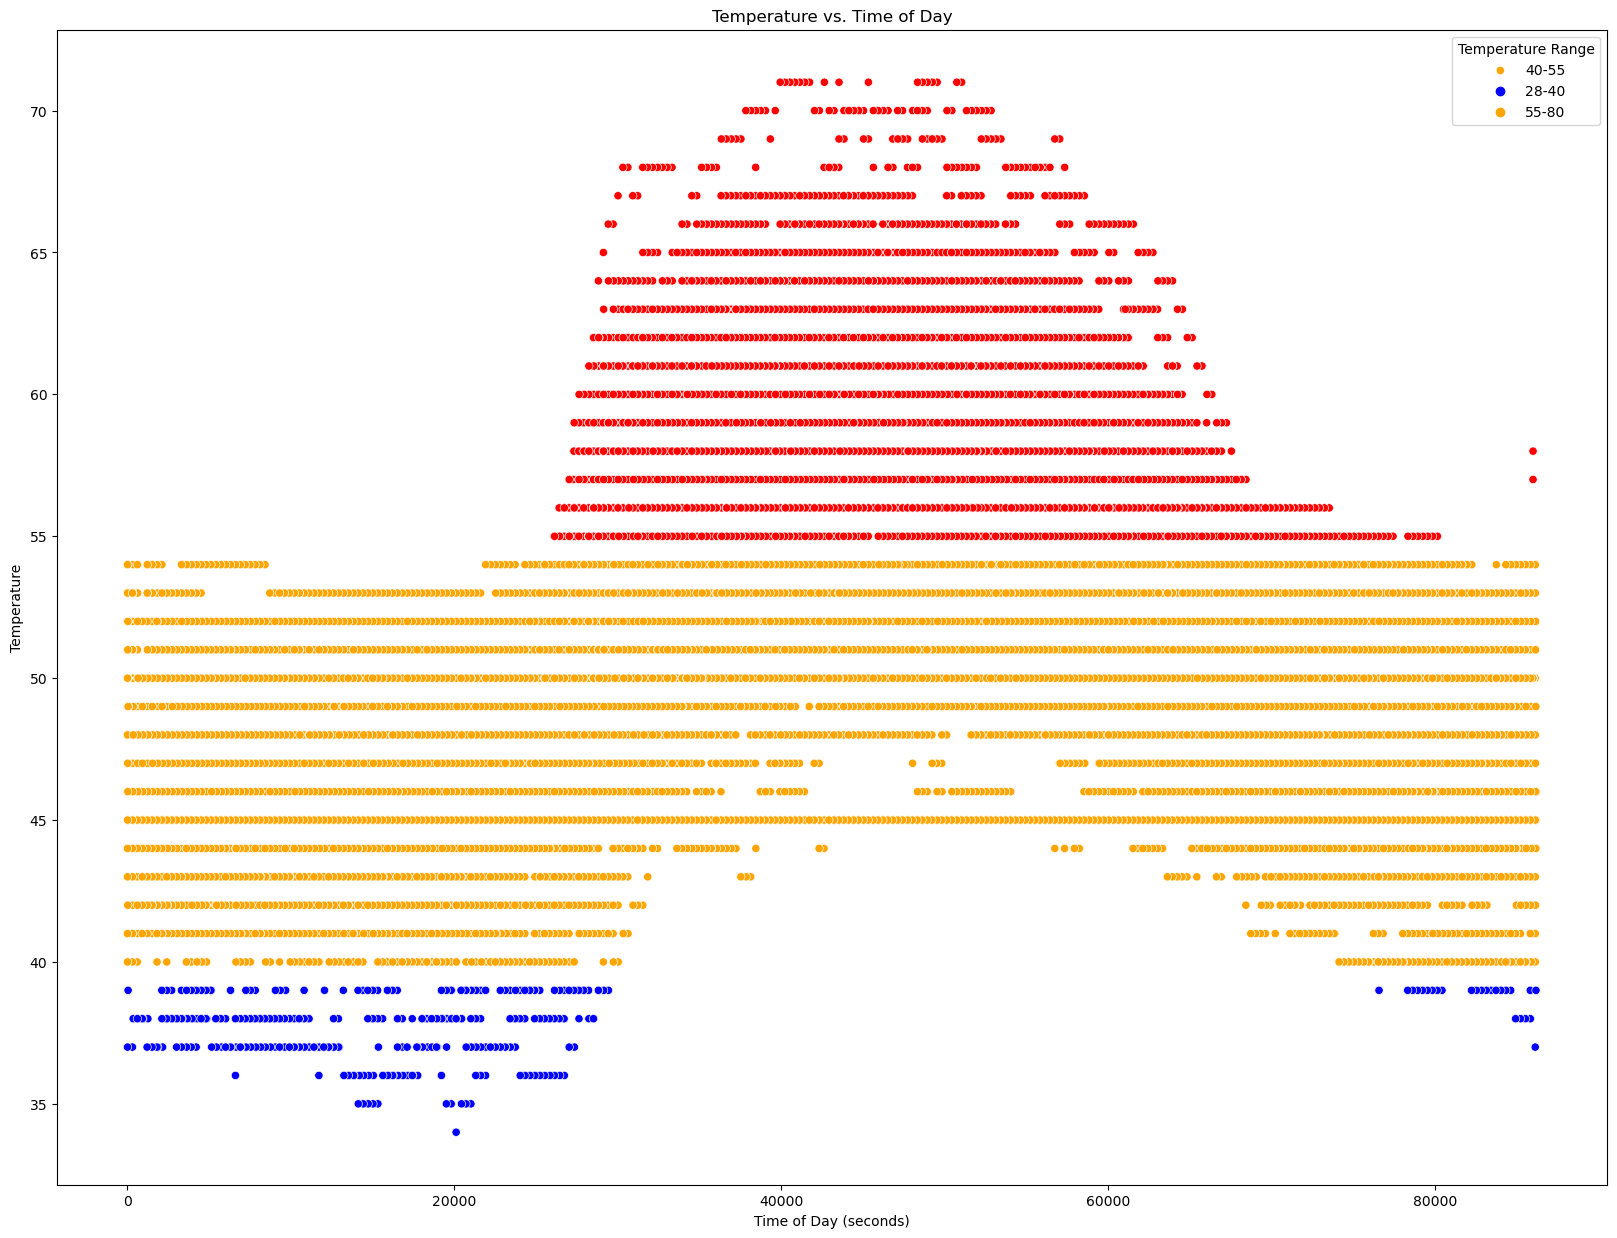

In [34]:
dft=df.copy()
temperature_ranges = [(28, 40), (40, 55), (55, 80)]
colors = ['blue', 'orange', 'red']

dft['TempRange'] = pd.cut(dft['Temperature'], bins=[28, 40, 55, 80], labels=False, right=False)

sns.scatterplot(x='TimeOfDay(s)', y='Temperature', hue='TempRange', data=dft, palette=colors)

plt.xlabel('Time of Day (seconds)')
plt.ylabel('Temperature')
plt.title('Temperature vs. Time of Day')
plt.legend(title='Temperature Range', labels=[ '40-55','28-40', '55-80'])
plt.show()

In [35]:
X_train_best = X_train[['Temperature','Humidity','DayOfYear', 'TimeOfDay(s)']]
X_test_best = X_test[['Temperature','Humidity', 'DayOfYear', 'TimeOfDay(s)']]

In [36]:
n=X_test_best.shape[0]
p=X_test_best.shape[1]

In [37]:
model=LinearRegression()
model.fit(X_train_best,y_train)

LinearRegression()

In [38]:
model.score(X_train_best,y_train)

0.6112474415067655

In [39]:
r1=model.score(X_test_best,y_test)

In [40]:
y_pred1=model.predict(X_test_best)
adj_r1 = 1-(1-r1)*(n-1)/(n-p-1)
rmse_sgd1 = sqrt(mean_squared_error(y_test,y_pred1))

In [41]:
model_1=BaggingRegressor()
model_1.fit(X_train_best,y_train)

BaggingRegressor()

In [42]:
model_1.score(X_train_best,y_train)

0.9879926655675415

In [43]:
r2=model_1.score(X_test_best,y_test)

In [44]:
y_pred2=model_1.predict(X_test_best)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rmse_sgd2 = sqrt(mean_squared_error(y_test,y_pred2))

In [45]:
model_2=DecisionTreeRegressor(criterion="friedman_mse")
model_2.fit(X_train_best,y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [46]:
model_2.score(X_train_best,y_train)

0.9999999999996567

In [47]:
r3=model_2.score(X_test_best,y_test)

In [48]:
y_pred3=model_2.predict(X_test_best)
adj_r3 = 1-(1-r3)*(n-1)/(n-p-1)
rmse_sgd3 = sqrt(mean_squared_error(y_test,y_pred3))

In [49]:
model_4=RandomForestRegressor(criterion="poisson",n_estimators=200)
model_4.fit(X_train_best,y_train)

RandomForestRegressor(criterion='poisson', n_estimators=200)

In [50]:
model_4.score(X_train_best,y_train)

0.9913861160638802

In [51]:
r4=model_4.score(X_test_best,y_test)

In [52]:
y_pred4=model_4.predict(X_test_best)
adj_r4 = 1-(1-r4)*(n-1)/(n-p-1)
rmse_sgd4 = sqrt(mean_squared_error(y_test,y_pred4))

In [53]:
model_5=KNeighborsRegressor()
model_5.fit(X_train_best,y_train)

KNeighborsRegressor()

In [54]:
r5=model_5.score(X_test_best,y_test)

In [55]:
y_pred5=model_5.predict(X_test_best)
adj_r5 = 1-(1-r5)*(n-1)/(n-p-1)
rmse_sgd5 = sqrt(mean_squared_error(y_test,y_pred5))

In [56]:
model_6=AdaBoostRegressor()
model_6.fit(X_train_best,y_train)

AdaBoostRegressor()

In [57]:
r6=model_6.score(X_test_best,y_test)

In [58]:
y_pred6=model_6.predict(X_test_best)
adj_r6 = 1-(1-r6)*(n-1)/(n-p-1)
rmse_sgd6 = sqrt(mean_squared_error(y_test,y_pred6))

In [59]:
Solar_metrics=pd.DataFrame({'model':['Linear regression','KNeighborsRegressor','AdaBoostRegressor','DecisionTreeRegressor','BaggingRegressor','RandomForestRegressor'],
                            'R-squared':[r1,r5,r6,r3,r2,r4],
                            'Adj_R-squared':[adj_r1,adj_r5,adj_r6,adj_r3,adj_r2,adj_r4],
                            "RMSE":[rmse_sgd1,rmse_sgd5,rmse_sgd6,rmse_sgd3,rmse_sgd2,rmse_sgd4]})

In [60]:
Solar_metrics

model  R-squared  Adj_R-squared        RMSE
0      Linear regression   0.601398       0.601155  198.942253
1    KNeighborsRegressor   0.835233       0.835133  127.906318
2      AdaBoostRegressor   0.809374       0.809258  137.577867
3  DecisionTreeRegressor   0.888783       0.888715  105.085466
4       BaggingRegressor   0.933663       0.933623   81.158527
5  RandomForestRegressor   0.936993       0.936954   79.095577

In [61]:
df['y_pred'] = model_4.predict(df[['Temperature','Humidity', 'DayOfYear', 'TimeOfDay(s)']])


output_notebook() 

p = figure(plot_width=800, 
           plot_height=400,
           title="Solar Irradiance Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Irradiance',
           x_axis_type="datetime")
p.x_range = Range1d(df.index[0], df.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))
p.line(df.index, df['Radiation'], legend='Observed Solar Irradiance', line_width=1)
p.line(df.index, df['y_pred'], legend='Predicted Solar Irradiance', line_width=1, line_color="red")

show(p, notebook_handle = True)

Loading BokehJS ...

In [62]:
model_4.predict([[48,59,273,86126]])

array([1.2169])